## Running SAM

Below, is a quickstart tutorial to analyze scRNA-seq data using SAM and visualize results. For a deeper exploration of all the attributes contained within a SAM object, feel free to explore the documentation in the source code 'SAM.py'.

In [1]:
from SAM import SAM

We initialize the SAM object with default values.

In [2]:
sam = SAM()

'load_data_from_file' loads the expression matrix from a tabular file, filters the data, and stores it in a scipy.sparse matrix. After loading the dense data, SAM saves the sparse data to a file for faster loading in the future for large datasets. The file is saved in the same folder as the tabular file.

SAM expects a data table of genes as rows and cells as columns. The first row of the table should be cell identifiers and the first column of the table should be gene identifiers.

Let's use all default parameters for now.

In [3]:
sam.load_data_from_file('../example_data/GSE74596_data.csv.gz',
                             save_sparse_files=True)

To load existing sparse data,

In [4]:
sam.load_sparse_data('../example_data/GSE74596_data_sparse.p')

We also have cell annotations we can load (optional),

In [5]:
sam.load_annotations('../example_data/GSE74596_ann.csv')

To run SAM using default parameters,

In [6]:
sam.run()

"""
Default parameters (these hardly ever need to be changed):

sam.run(max_iter=10,
            verbose=True,
            projection='umap',
            n_genes=None,
            npcs=None,
            stopping_condition=5e-3,
            num_norm_avg=50,
            weight_PCs=True,
            preprocessing='Normalizer'):
"""            

RUNNING SAM
Iteration: 0, Convergence: 0.5288079416624751
Iteration: 1, Convergence: 0.27299805514037856
Iteration: 2, Convergence: 0.019764119871655116
Iteration: 3, Convergence: 0.005829376712885454
Computing the UMAP embedding...
Elapsed time: 5.372451305389404 seconds


"\nDefault parameters (these hardly ever need to be changed):\n\nsam.run(max_iter=10,\n            verbose=True,\n            projection='umap',\n            n_genes=None,\n            npcs=None,\n            stopping_condition=5e-3,\n            num_norm_avg=50,\n            weight_PCs=True,\n            preprocessing='Normalizer'):\n"

If 'preprocessing' is 'Normalizer', use sklearn.preprocessing.Normalizer, which normalizes expression data prior to PCA such that each cell has unit L2 norm. If 'StandardScaler', use sklearn.preprocessing.StandardScaler, which normalizes expression data prior to PCA such that each gene has zero mean and unit variance. Otherwise, do not normalize the expression data. 



We recommend using 'StandardScaler' for datasets with low sequencing depth, such as UMI datasets, and 'Normalizer' otherwise.

To compute a umap projection (already automatically computed above, but recomputed here for demonstration's sake):

In [7]:
sam.run_umap();

To compute a t-SNE projection:

In [8]:
sam.run_tsne();

## Visualization

To visualize the t-SNE embedding:

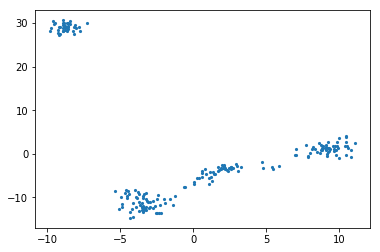

In [9]:
sam.scatter(projection='tsne')

To visualize the UMAP embedding:

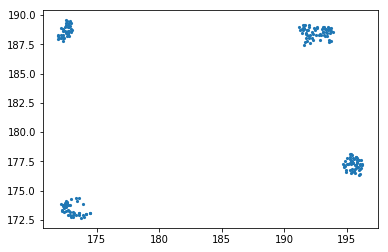

In [10]:
sam.scatter(projection='umap')

To visualize the UMAP embedding with our ground truth annotations overlaid:

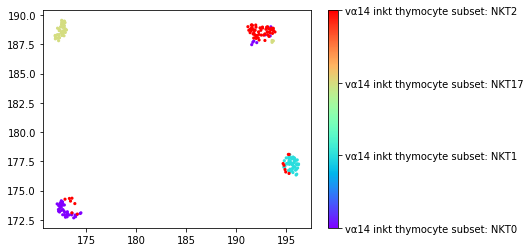

In [11]:
sam.scatter(c=sam.annotations,projection='umap')

The ranked genes are stored in 'sam.ranked_genes'. Printing the top 10 ranked_genes,

In [12]:
print( sam.ranked_genes[:10] )

['ENSMUSG00000006398.15' 'ENSMUSG00000094777.2' 'ENSMUSG00000046057.4'
 'ENSMUSG00000014453.3' 'ENSMUSG00000032218.6' 'ENSMUSG00000023367.14'
 'ENSMUSG00000044734.15' 'ENSMUSG00000023505.13' 'ENSMUSG00000058773.2'
 'ENSMUSG00000001403.13']


If we want to display the gene expression pattern of the number one ranked gene, we can use the following:

(Note that all valid keyword arguments for 'matplotlib.pyplot.scatter' can be used in any of the plotting functions).

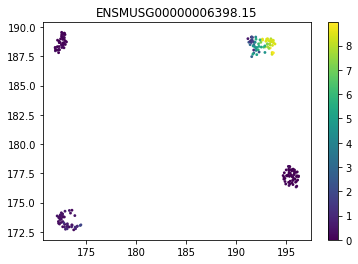

In [13]:
sam.show_gene_expression( sam.ranked_genes[0], s=8, cmap='viridis', projection='umap')

To display the top 3 genes,

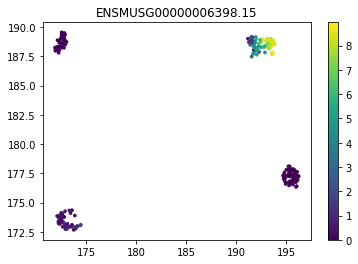

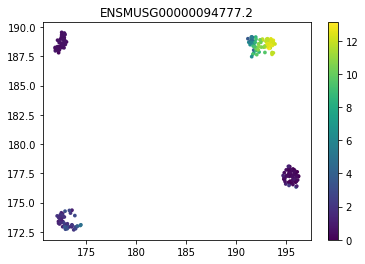

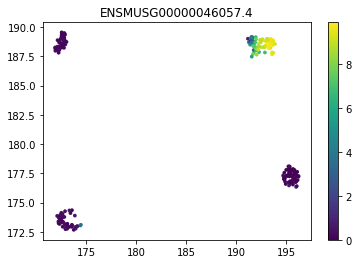

In [14]:
sam.plot_top_genes(n_genes=3,s=14,cmap='viridis')

To display roughly orthogonal gene expression patterns:

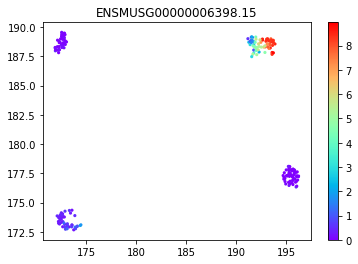

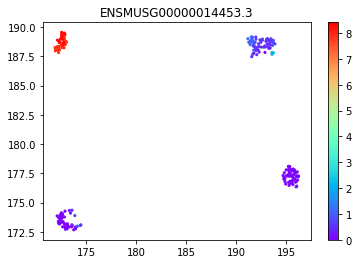

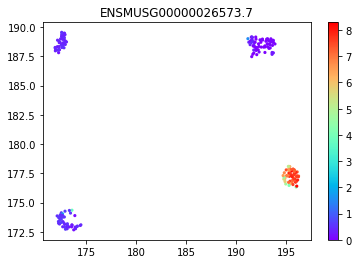

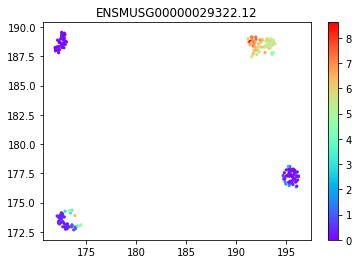

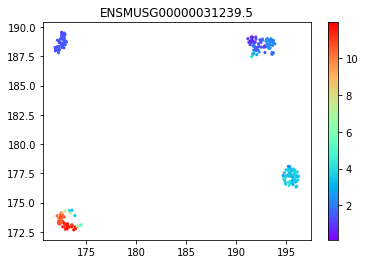

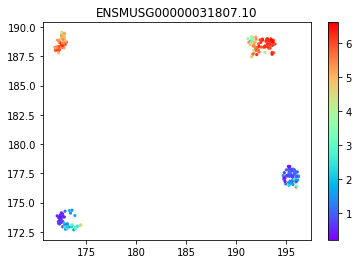

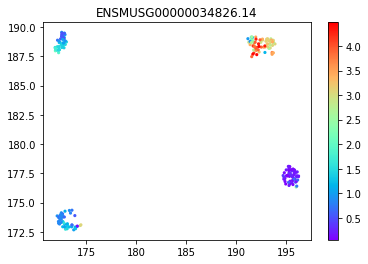

In [15]:
sam.plot_correlated_groups(cmap='rainbow',edgecolor='black')

#save all opened figures to a pdf file
sam.save_figures('all_figures.pdf')
#save figures 2 and 4 to a pdf file
sam.save_figures('figures_2_4.pdf',fig_IDs=[2,4])
#save figure 3 to a png file
sam.save_figures('figure_3.png',fig_IDs=3)


To display genes correlated with a given gene:

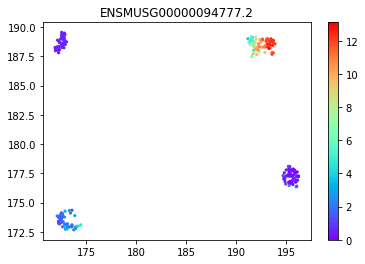

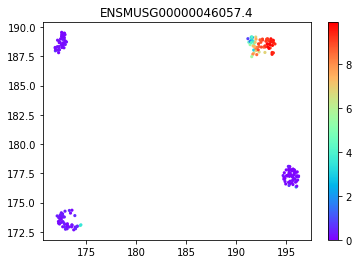

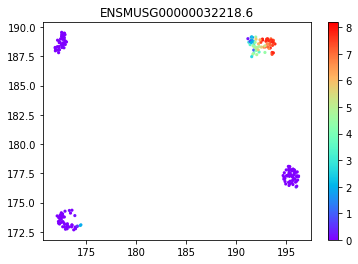

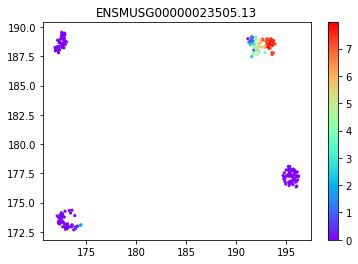

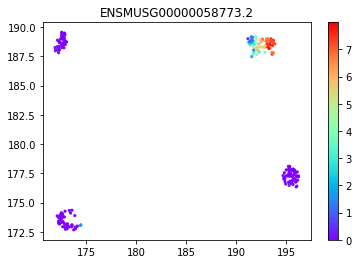

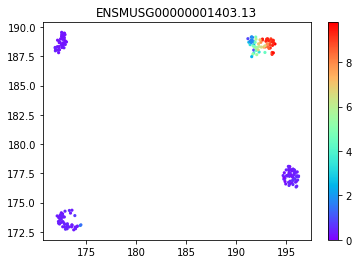

In [16]:
sam.plot_correlated_genes( sam.ranked_genes[0] , n_genes=6 ); 

## Clustering
To run kmeans clustering and visualize the results:

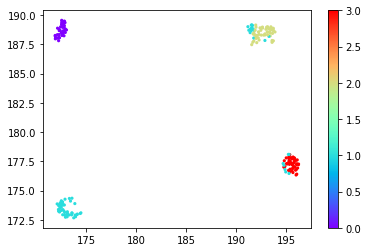

In [17]:
sam.kmeans(4) #we want to find 4 clusters
sam.scatter(c = sam.cluster_labels_k) 
#(sam.cluster_labels_k are the kmeans cluster labels)

If the 'louvain' optional dependency is installed, you can also louvain clustering:

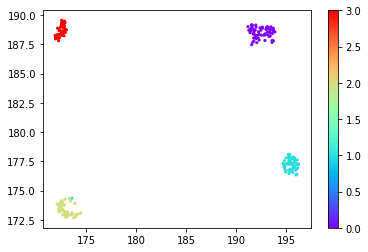

In [18]:
sam.louvain_clustering()
sam.scatter(c = sam.cluster_labels)
#(sam.cluster_labels are the louvain cluster labels)

## Ranking marker genes for each cluster
SAM provides three ways of identifying marker genes. We can use a Support Vector Machine classification approach:

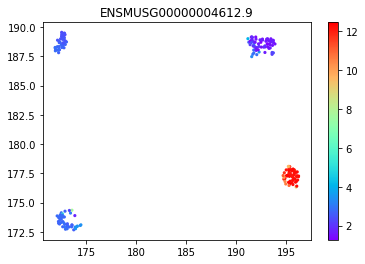

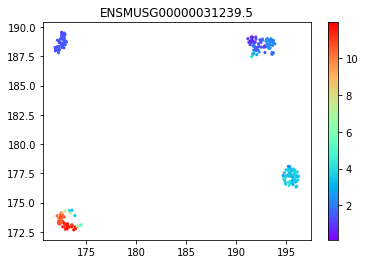

In [19]:
#let's say we want to find the top 20 marker genes for each cluster
sam.identify_marker_genes_model(n_genes_per_cluster=20, svm = True)
#output the top ranked marker gene for cluster 1
sam.show_gene_expression(sam.marker_genes_model[1,0])
#output the top ranked marker gene for cluster 2
sam.show_gene_expression(sam.marker_genes_model[2,0])

We can use logistic regression:

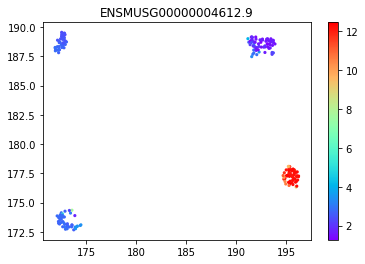

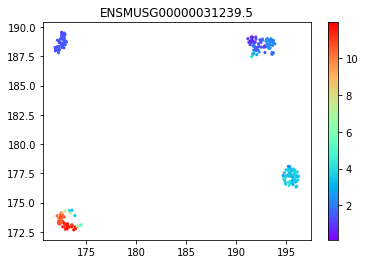

In [20]:
#let's say we want to find the top 20 marker genes for each cluster
sam.identify_marker_genes_model(n_genes_per_cluster=20, svm = False)
#output the top ranked marker gene for cluster 1
sam.show_gene_expression(sam.marker_genes_model[1,0])
#output the top ranked marker gene for cluster 2
sam.show_gene_expression(sam.marker_genes_model[2,0])

Or we can use a custom expression-ratio approach (see source for implementation details):

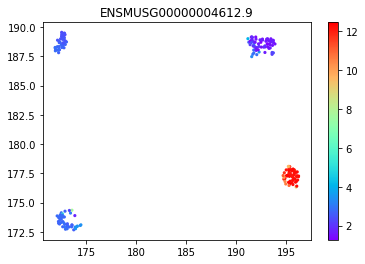

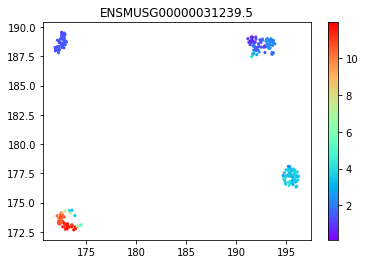

In [21]:
#let's say we want to find the top 20 marker genes for each cluster
sam.identify_marker_genes_ratio(n_genes_per_cluster=20)
#output the top ranked marker gene for cluster 1
sam.show_gene_expression(sam.marker_genes_ratio[1,0])
#output the top ranked marker gene for cluster 2
sam.show_gene_expression(sam.marker_genes_ratio[2,0])

## Input/Output

To save the SAM object and all its contents into a Pickle file:

In [22]:
sam.save('example_save',dirname = 'output_directory')

To load a saved SAM object:

In [23]:
sam=SAM(); #create an empty SAM object
sam.load('output_directory/example_save.p')

Individual attributes within the SAM object, such as the cell-to-cell distance matrix, the list of ranked genes, the nearest neighbor matrix, the rescaled expression matrix, etc., can be manually saved/exported using any desired method.

See below for a list of all attributes stored in SAM after running the analysis:

In [24]:
list(sam.__dict__.keys())

['k',
 'distance',
 'analysis_performed',
 'output_vars',
 'sparse_data',
 'all_cell_names',
 'all_gene_names',
 'D',
 'gene_names',
 'cell_names',
 'D2',
 'annotations',
 'integer_annotations',
 'D_avg',
 'dispersions',
 'D_sub',
 'wPCA_data',
 'pca',
 'dist',
 'knn_indices',
 'knn_dists',
 'indices',
 'nnm_adj',
 'weights',
 'umap2d',
 'datalog',
 'D_avg_f',
 'weights_f',
 'ranked_genes',
 'geneID_groups',
 'tsne2d',
 'cluster_labels_k',
 'cluster_labels',
 'marker_genes_model',
 'marker_genes_ratio']